In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
d=pd.read_csv('liver.csv')
d

,Unnamed: 0,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,0,85,92,45,27,31,0.0
1,1,85,64,59,32,23,0.0
2,2,86,54,33,16,54,0.0
3,3,91,78,34,24,36,0.0
4,4,87,70,12,28,10,0.0
...,...,...,...,...,...,...,...
340,340,99,75,26,24,41,12.0
341,341,96,69,53,43,203,12.0
342,342,98,77,55,35,89,15.0
343,343,91,68,27,26,14,16.0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  345 non-null    int64  
 1   mcv         345 non-null    int64  
 2   alkphos     345 non-null    int64  
 3   sgpt        345 non-null    int64  
 4   sgot        345 non-null    int64  
 5   gammagt     345 non-null    int64  
 6   drinks      345 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [5]:
d.describe()

,Unnamed: 0,mcv,alkphos,sgpt,sgot,gammagt,drinks
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,172.000000,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072
std,99.737155,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835
min,0.000000,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,86.000000,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,172.000000,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,258.000000,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000
max,344.000000,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


In [6]:
#alkphos, sdpt,sgot,gammagt, outliers are present

## EDA

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

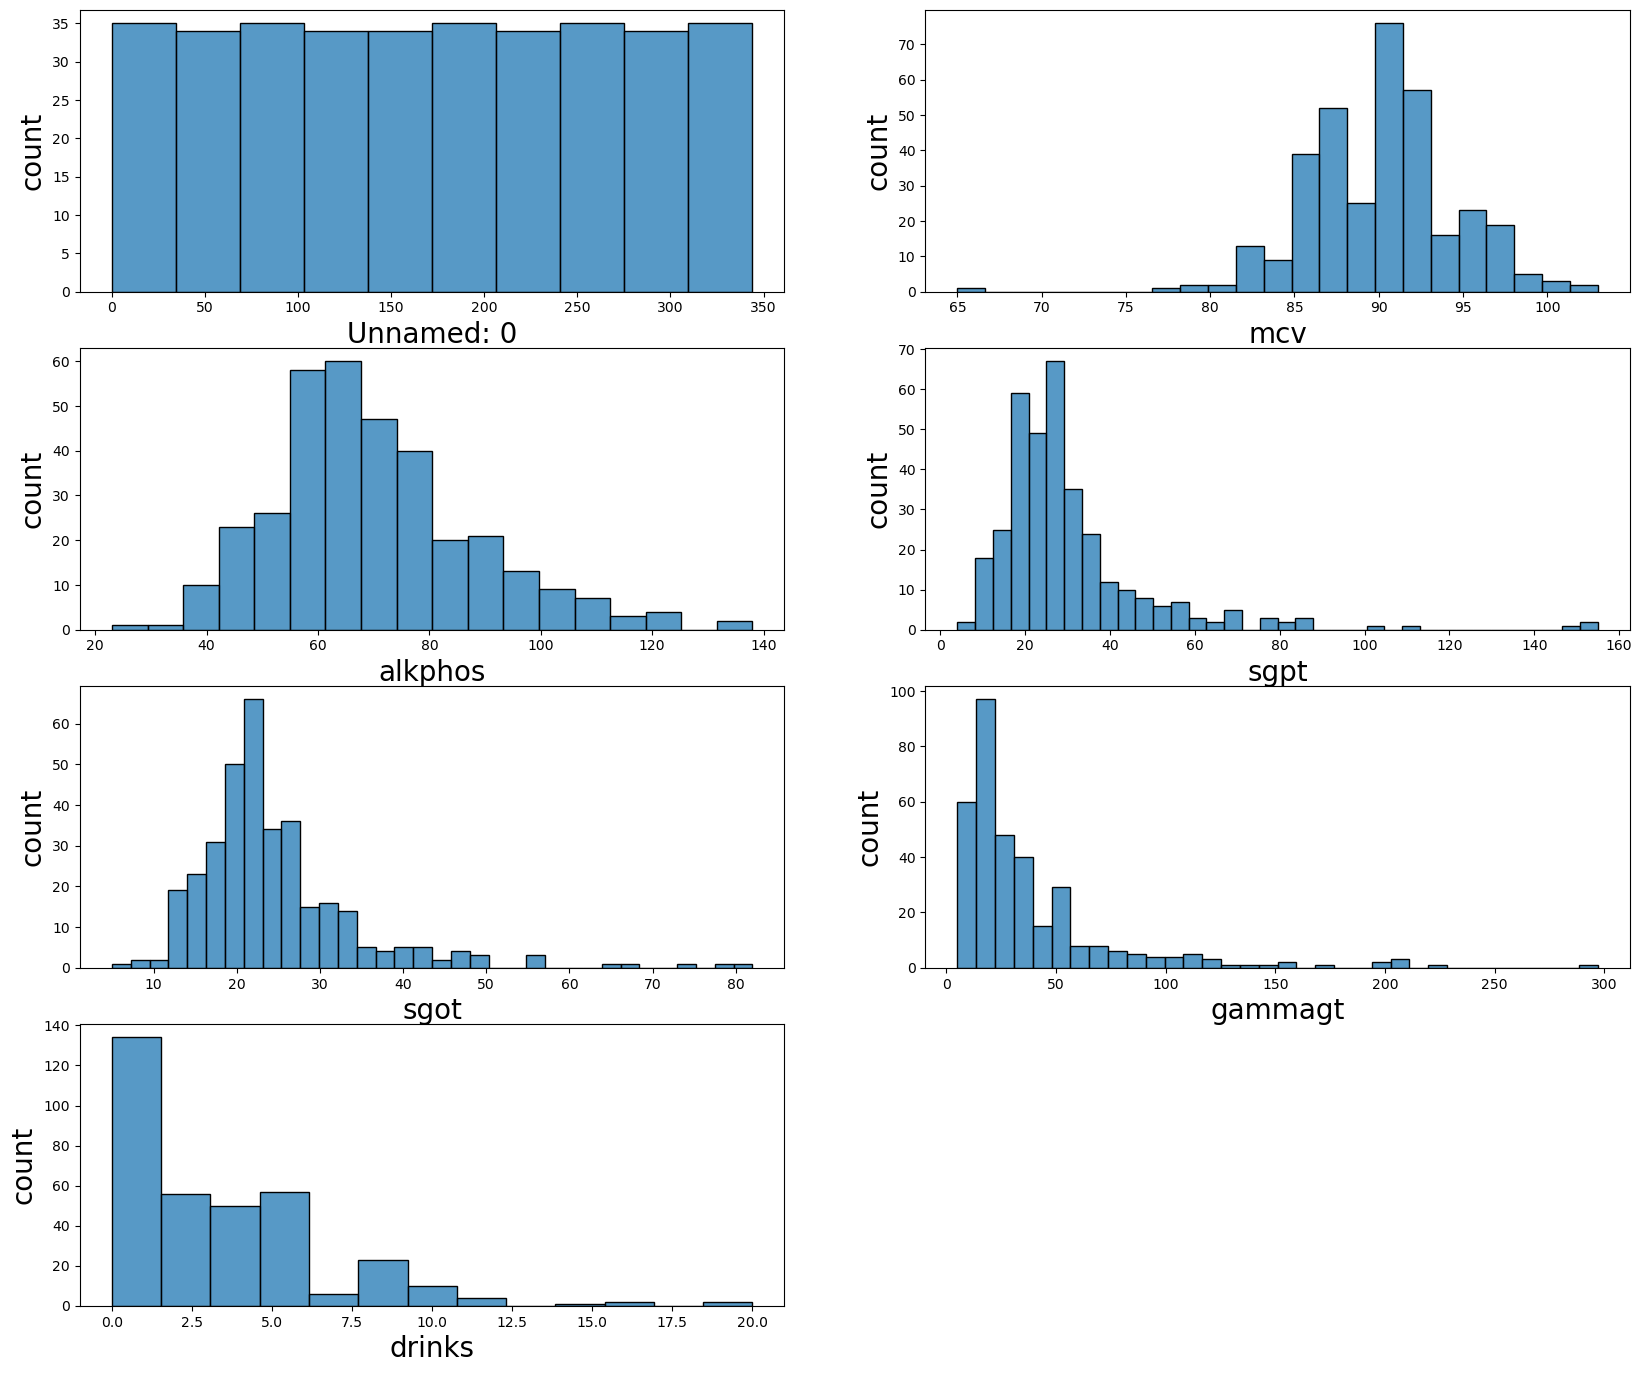

In [13]:
#uniivarate

plt.figure(figsize=(20,30),facecolor='white')
plot=1
for col in d.columns:
    if plot<=7:
        ax=plt.subplot(7,2,plot)
        sns.histplot(d[col])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

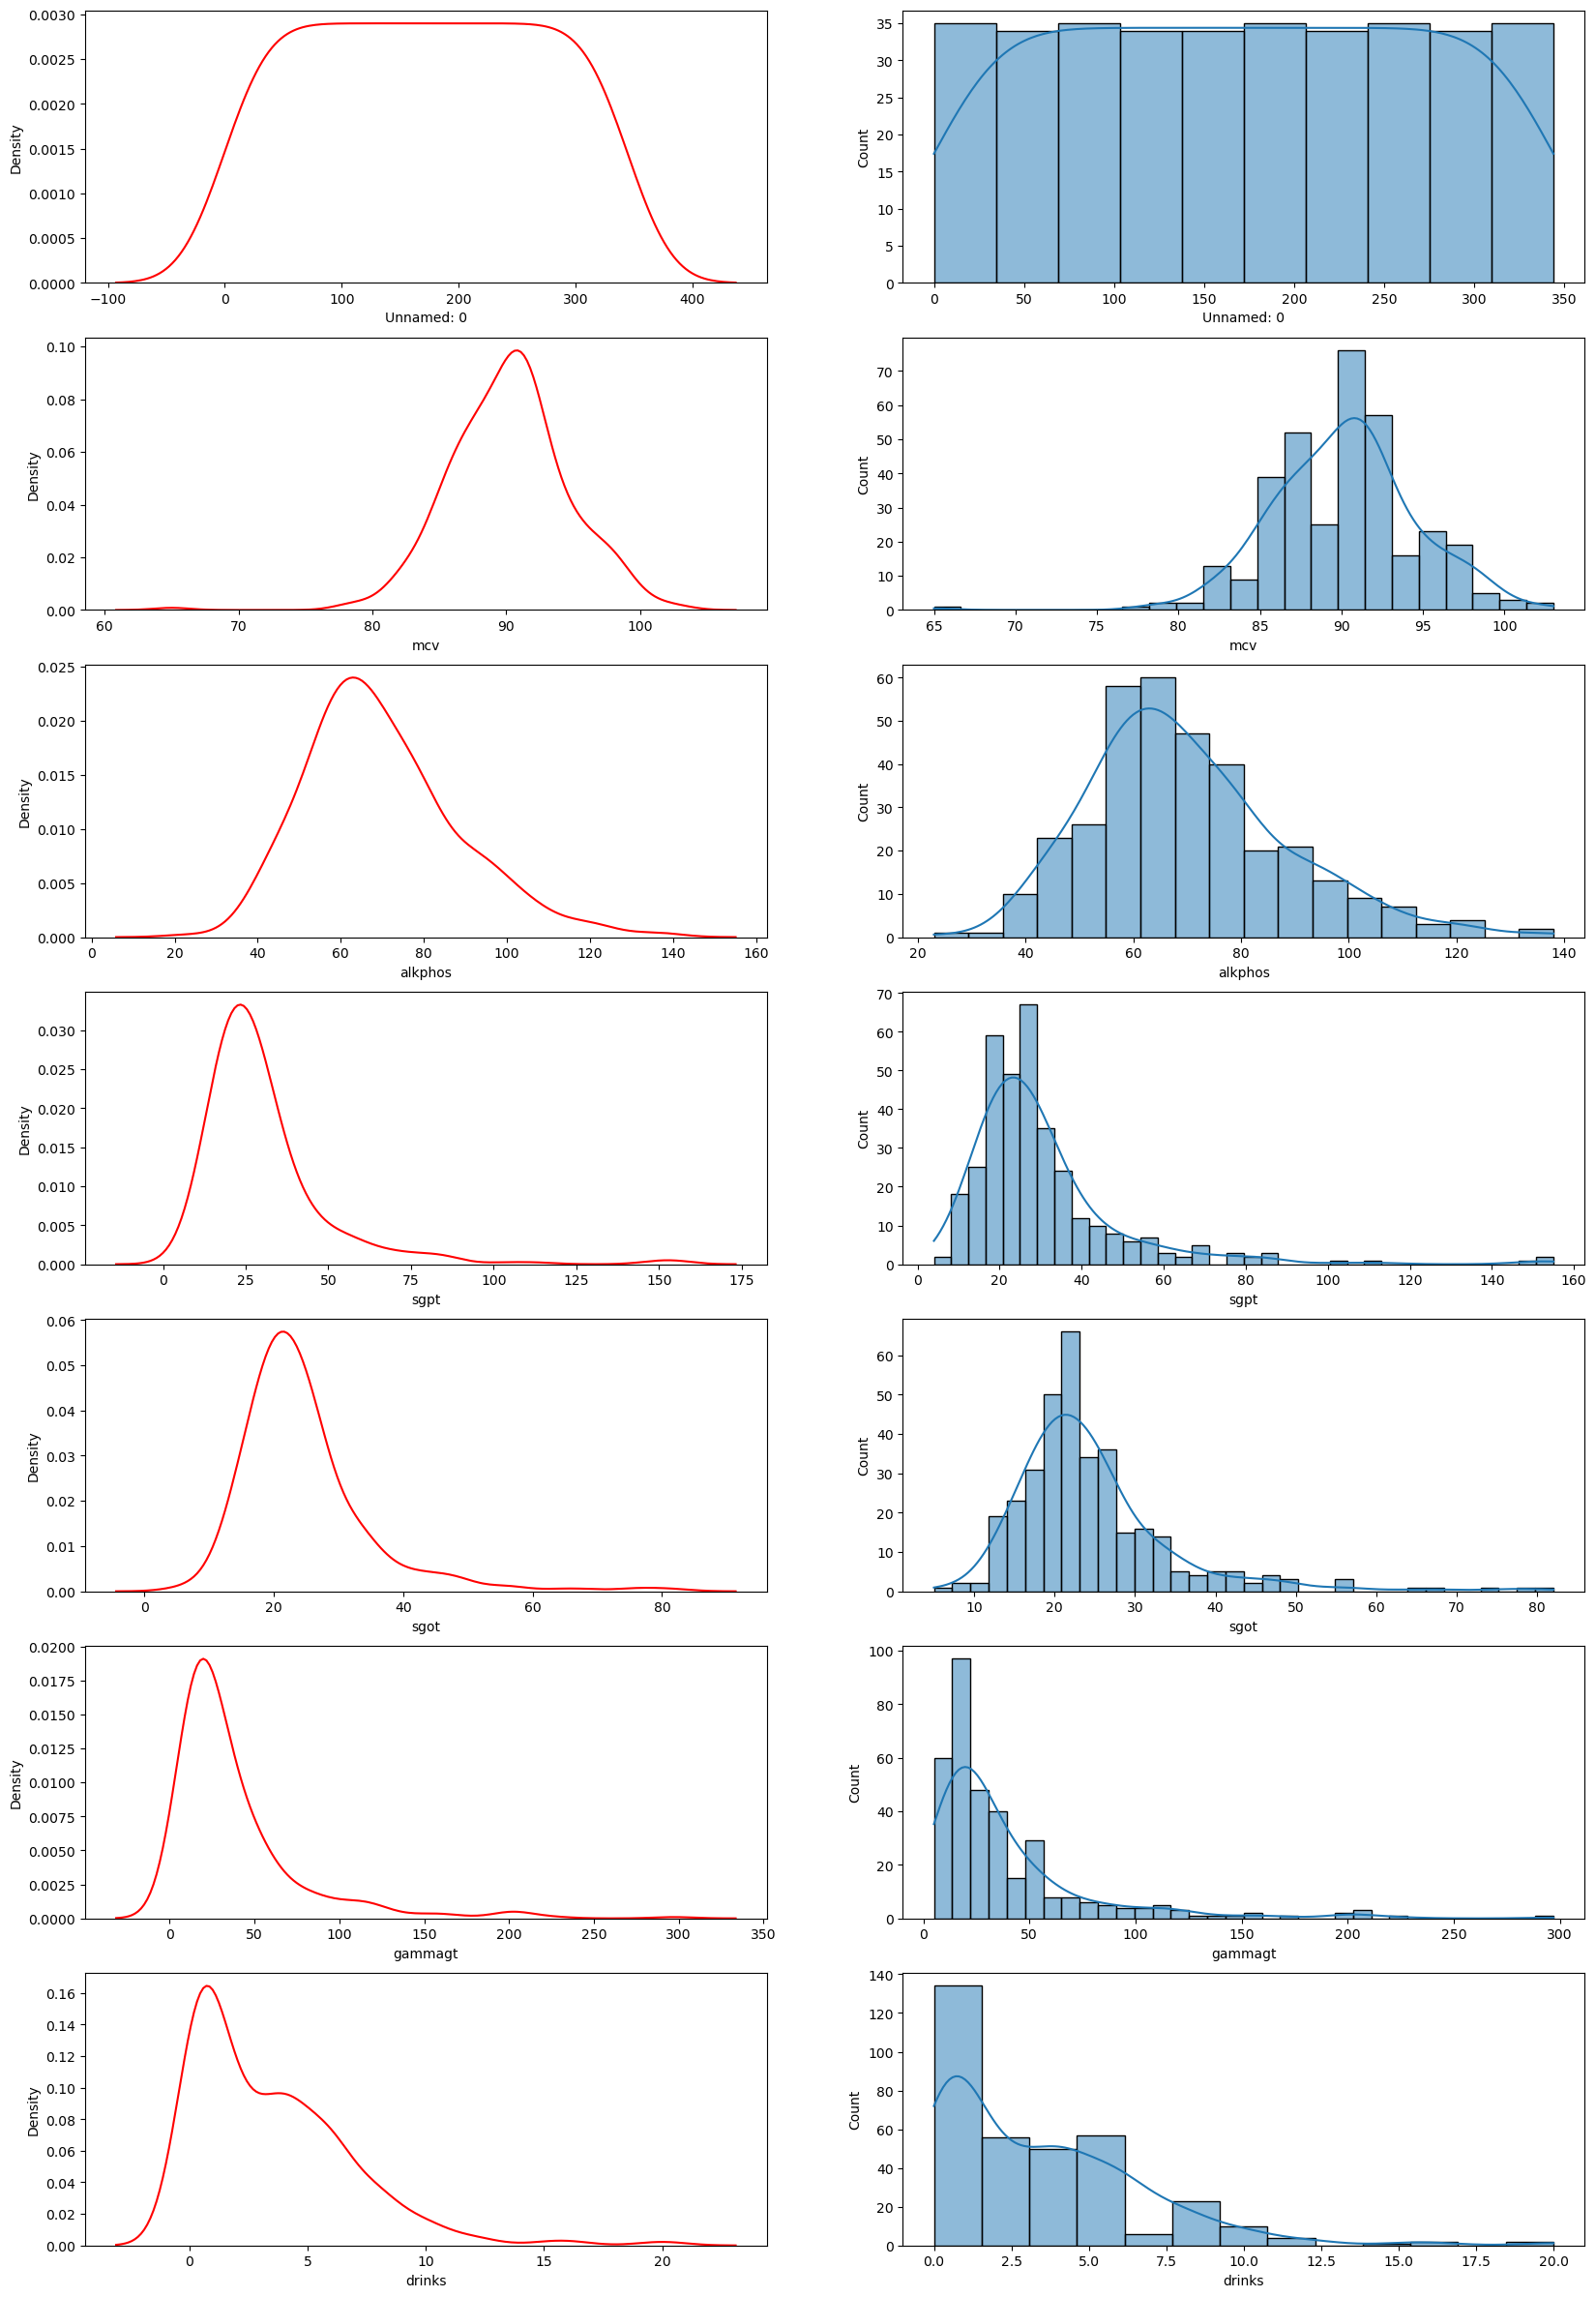

In [36]:
fig,ax=plt.subplots(7,2,figsize=(20,30))
m,n=0,0
for col in d.columns:
    sns.distplot(d[col],hist=False,ax=ax[m][n],color='r')
    sns.histplot(d[col], kde=True, ax=ax[m][n+1])
    m+=1



<Axes: xlabel='alkphos', ylabel='Count'>

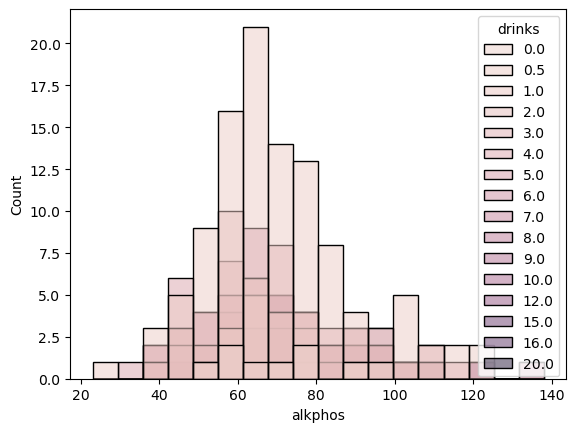

In [37]:
sns.histplot(x='alkphos', hue='drinks', data=d)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

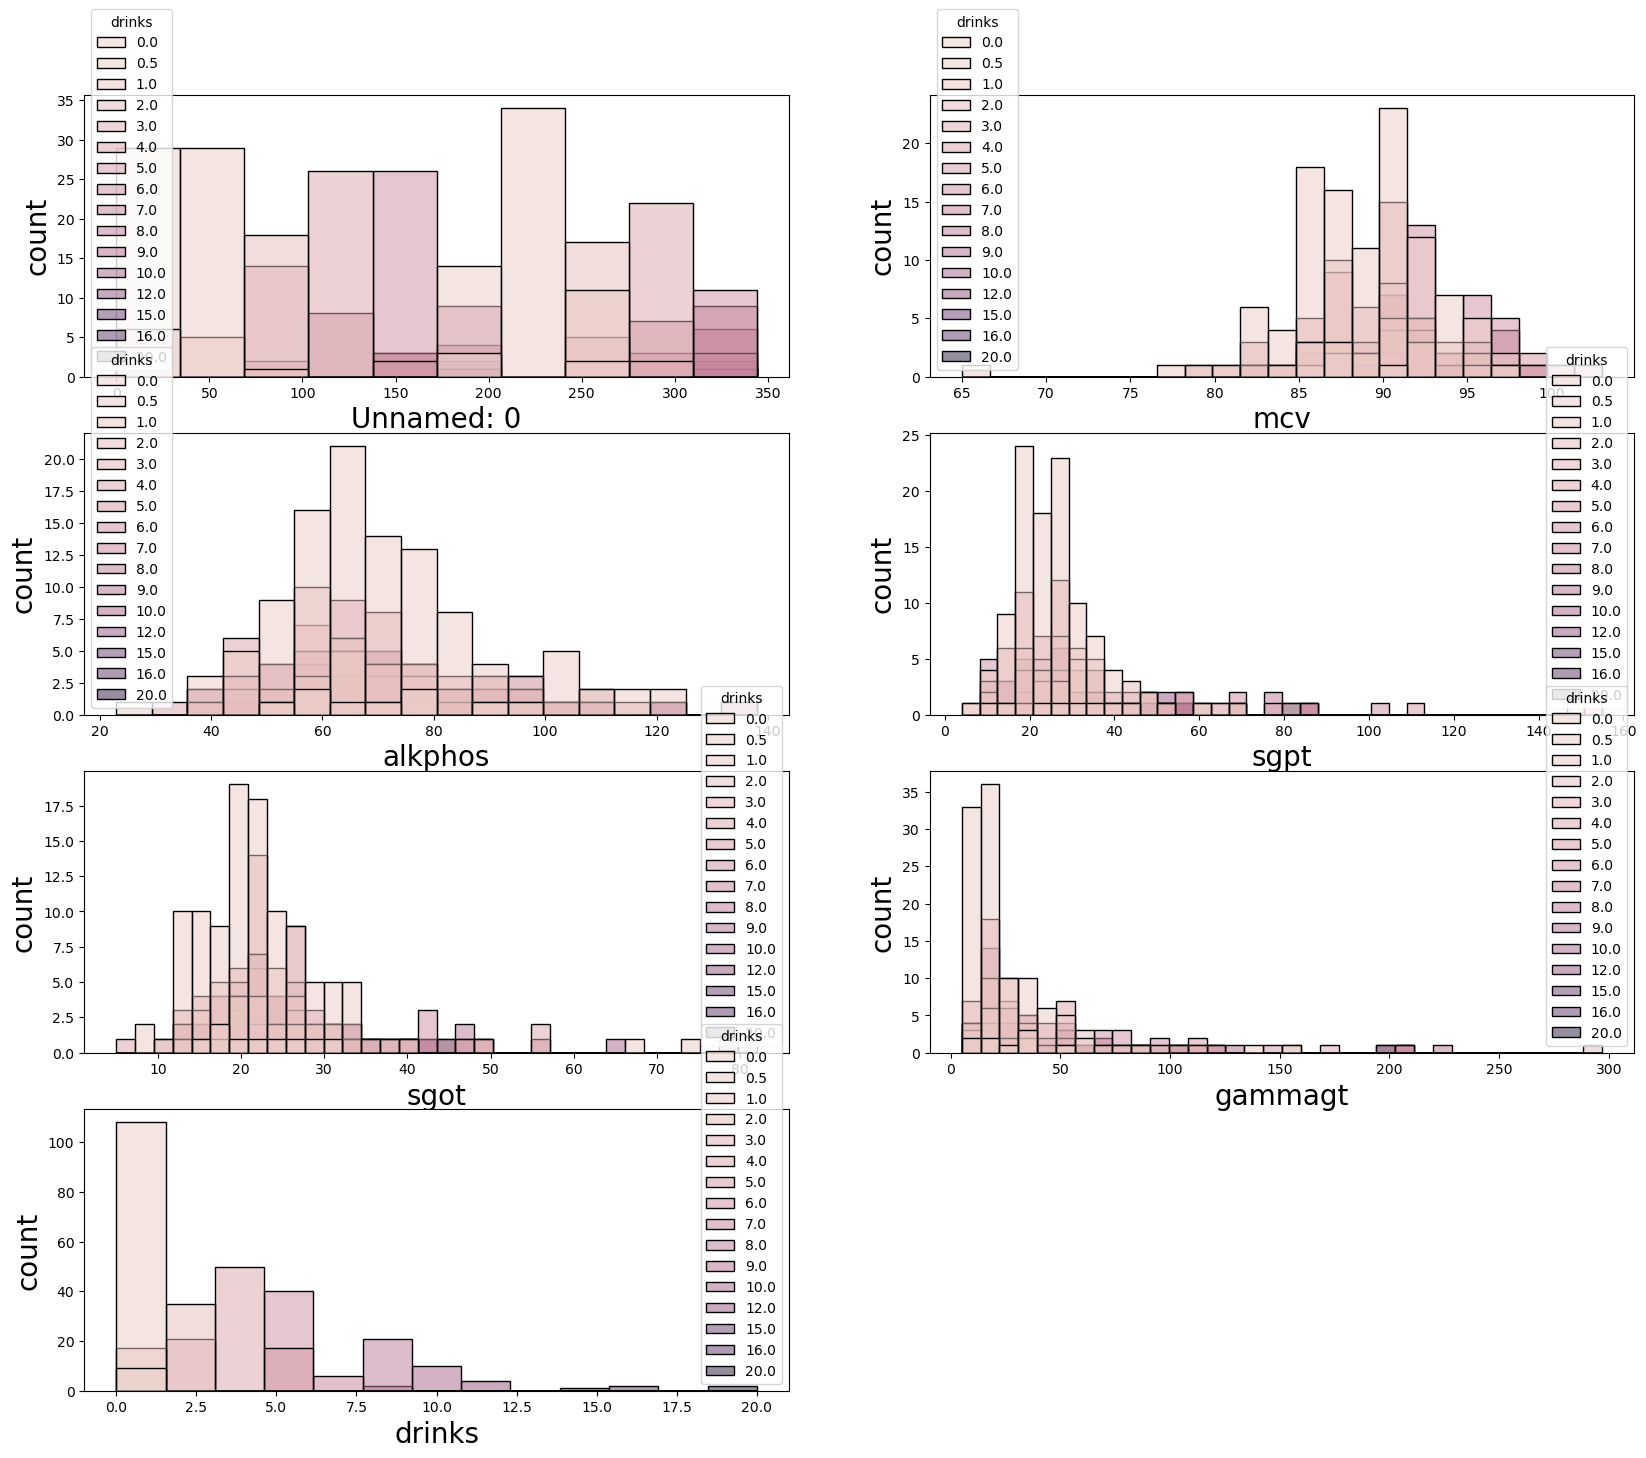

In [41]:
plt.figure(figsize=(20,30),facecolor='white')
plot=1
for col in d.columns:
    if plot<=7:
        ax=plt.subplot(7,2,plot)
        sns.histplot(x=d[col].dropna(axis=0),hue=d.drinks)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

In [43]:
d.head(1)

,Unnamed: 0,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,0,85,92,45,27,31,0.0


<Axes: xlabel='mcv', ylabel='alkphos'>

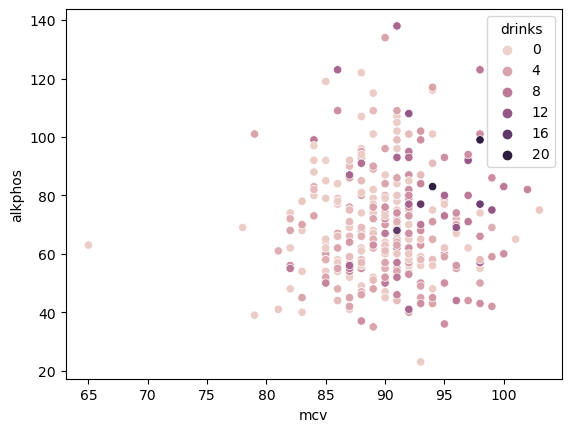

In [47]:
sns.scatterplot(x='mcv',y='alkphos',hue='drinks', data=d)

<Axes: xlabel='mcv', ylabel='sgot'>

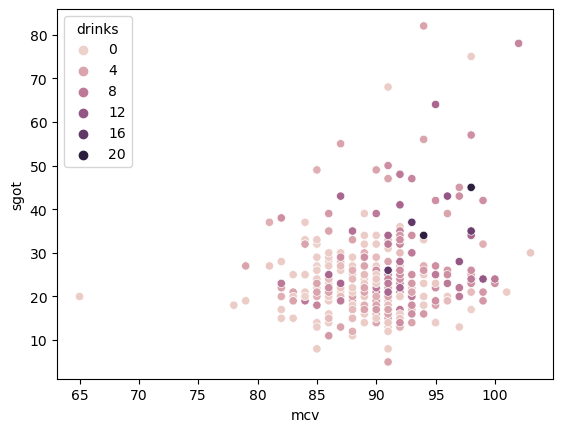

In [49]:
sns.scatterplot(x='mcv',y='sgot',hue='drinks', data=d)

<Axes: xlabel='mcv', ylabel='sgpt'>

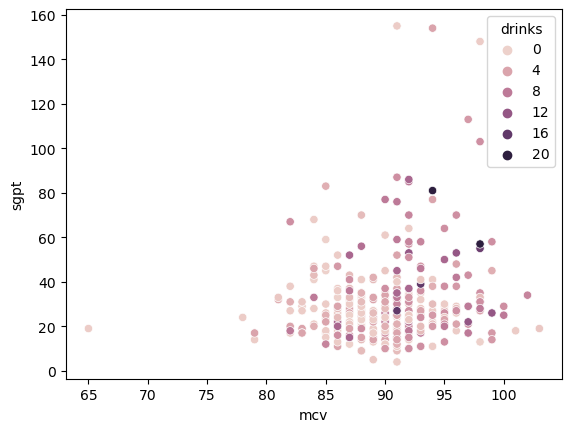

In [50]:
sns.scatterplot(x='mcv',y='sgpt',hue='drinks', data=d)

<Axes: xlabel='mcv', ylabel='gammagt'>

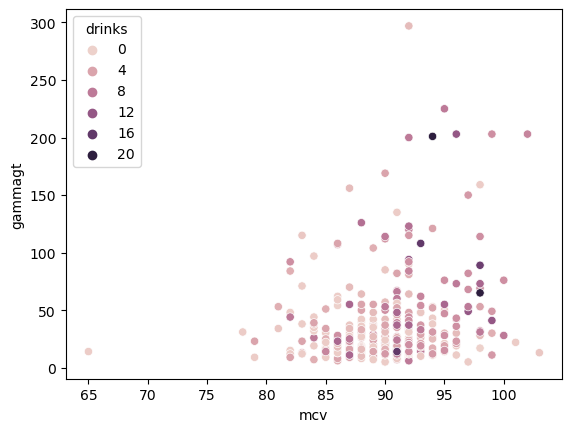

In [55]:
sns.scatterplot(x='mcv',y='gammagt',hue='drinks', data=d)

<Axes: xlabel='sgpt', ylabel='drinks'>

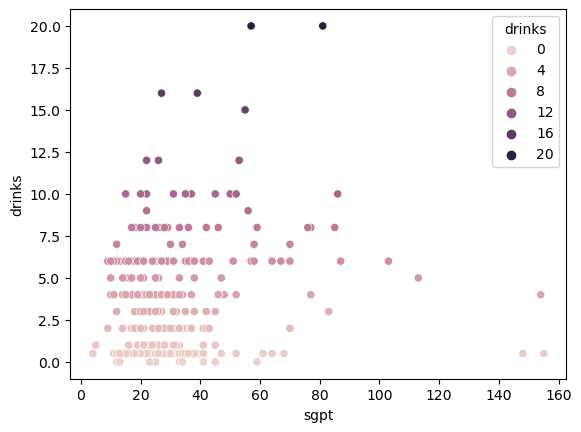

In [56]:
sns.scatterplot(x='sgpt',y='drinks',hue='drinks', data=d)

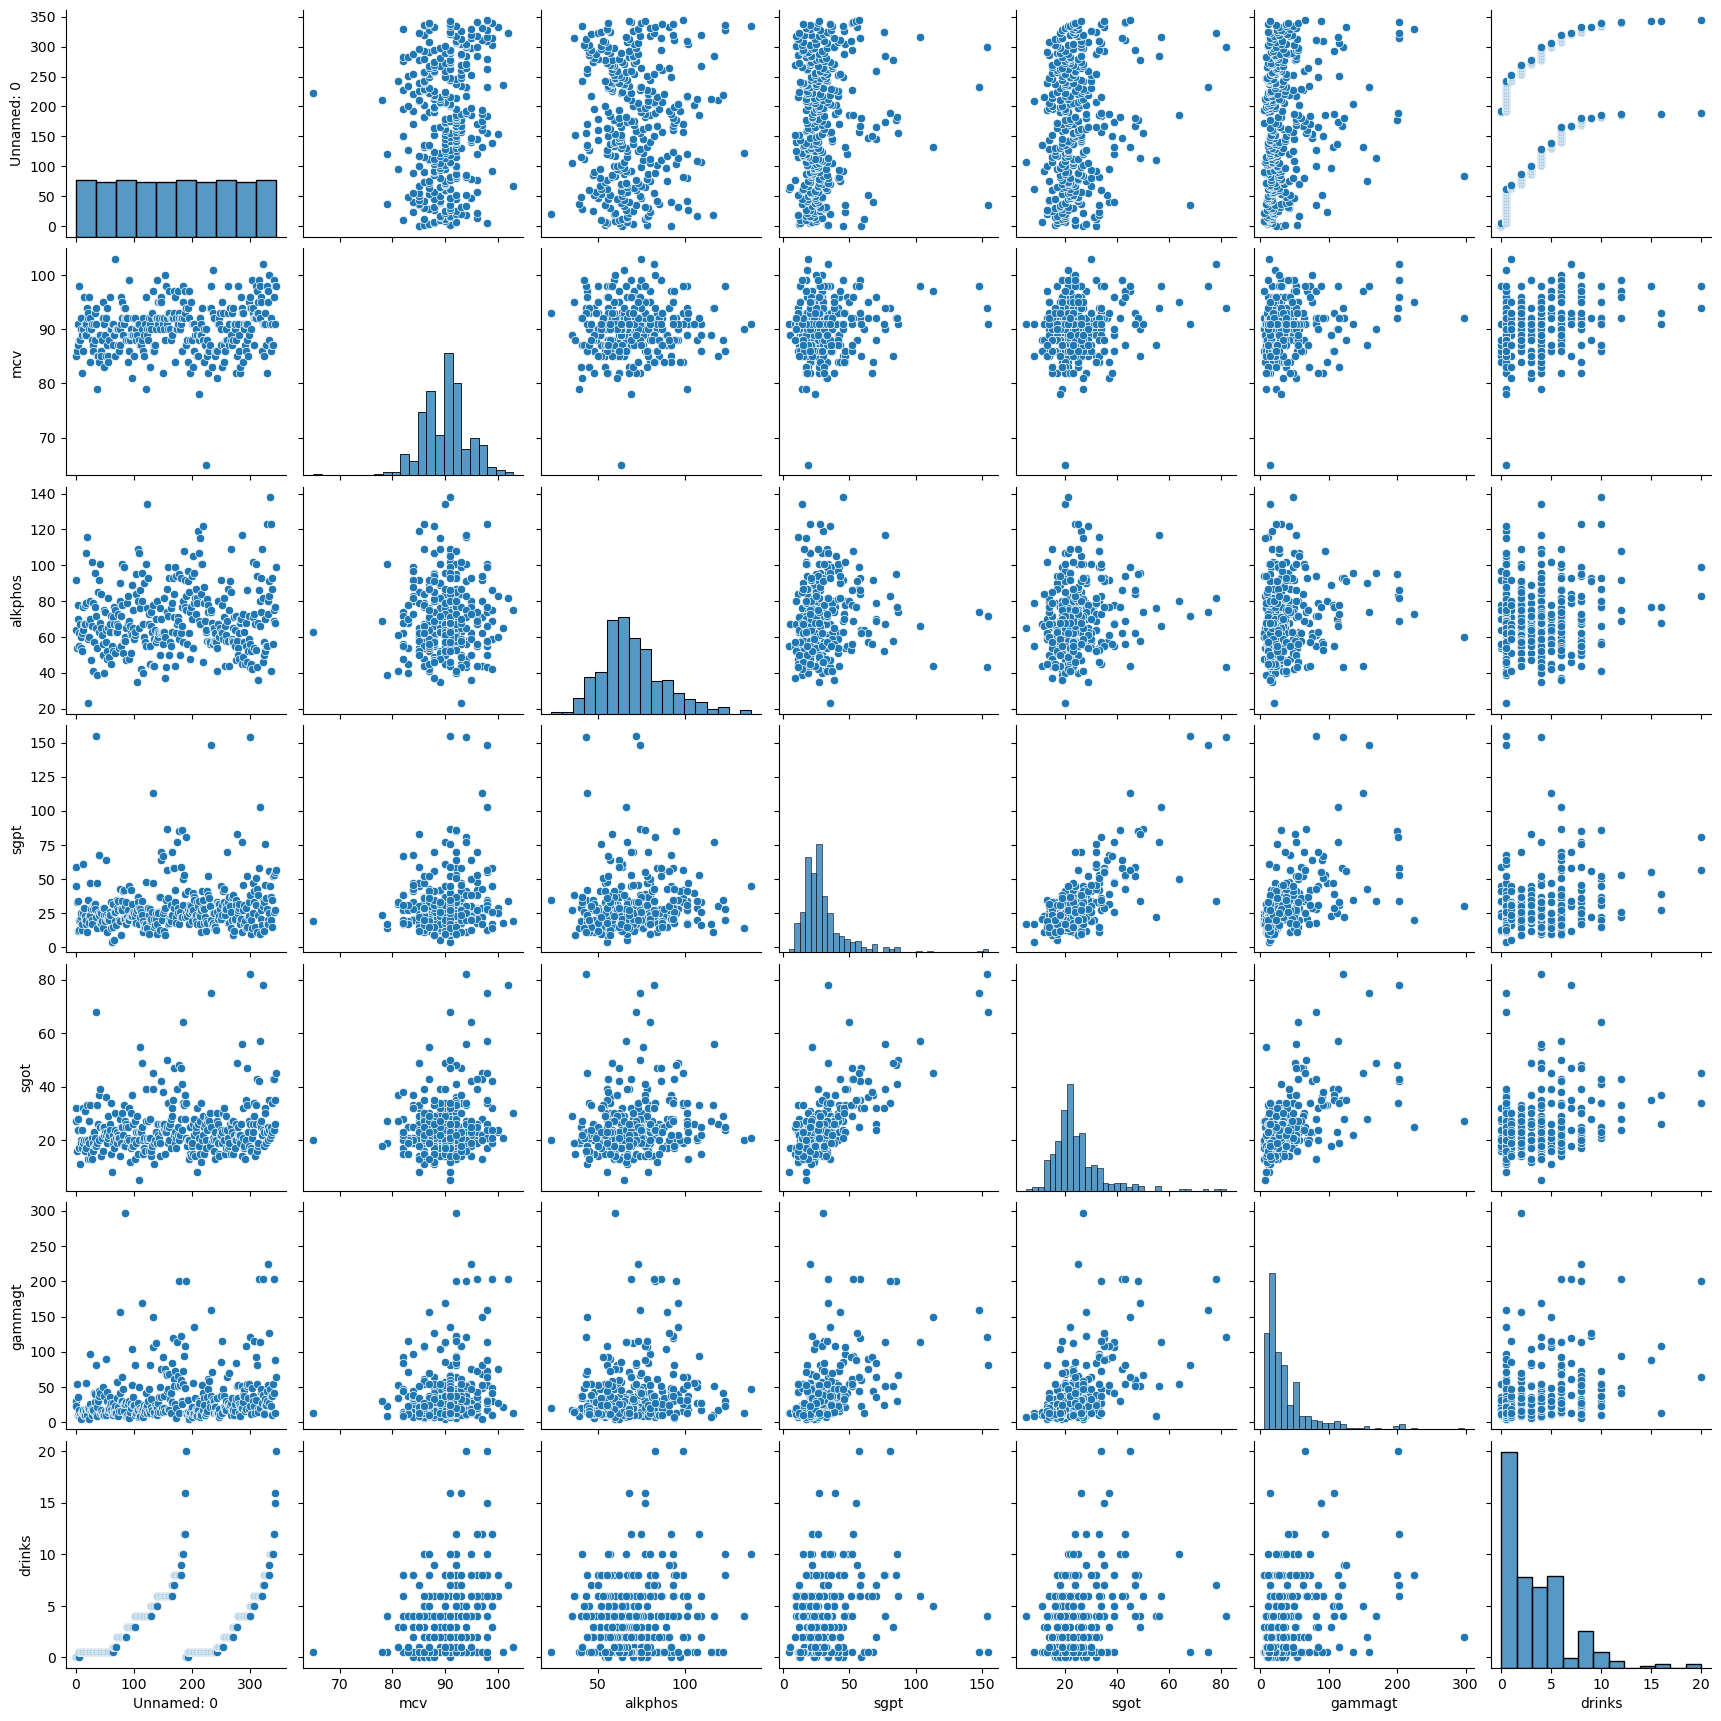

In [57]:
sns.pairplot(data=d)

In [58]:
d.corr()

,Unnamed: 0,mcv,alkphos,sgpt,sgot,gammagt,drinks
Unnamed: 0,1.000000,0.143016,0.057121,0.113917,0.156060,0.177390,0.449730
mcv,0.143016,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680
alkphos,0.057121,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796
sgpt,0.113917,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848
sgot,0.156060,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588
gammagt,0.177390,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224
drinks,0.449730,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000


In [66]:
d.drop('Unnamed:0',axis=1,inplace=True)

KeyError: "['Unnamed:0'] not found in axis"

In [67]:
d

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


<Axes: >

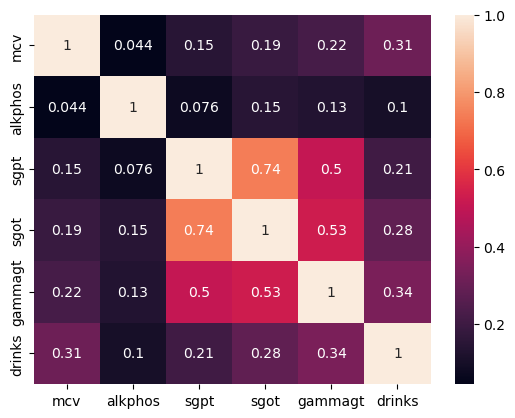

In [68]:
sns.heatmap(d.corr(), annot=True)

In [105]:
d.drop(['sgot','sgpt', axis=1, inplace=True)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (454669792.py, line 1)

<Axes: >

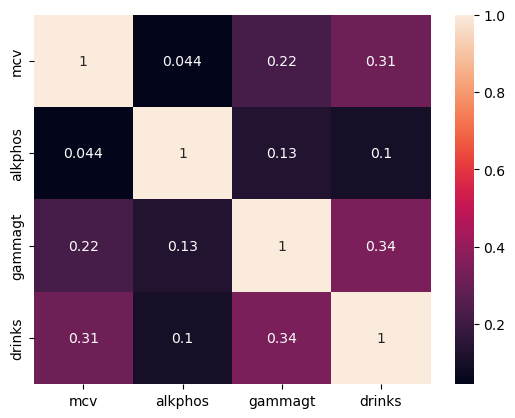

In [106]:
sns.heatmap(d.corr(), annot=True)

In [107]:
x=d[['mcv','alkphos','gammagt','drinks']]

In [142]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2, random_state=10)
model.fit(x)

KMeans(n_clusters=2, random_state=10)

In [143]:
x.shape

(345, 4)

In [144]:
model.cluster_centers_

array([[ 89.98045603,  69.24104235,  26.99022801,   3.16123779],
       [ 91.60526316,  74.94736842, 129.52631579,   5.82894737]])

In [145]:
color_scheme=np.array(['red','yellow', 'pink', 'cyan', 'green','skyblue'])
color_scheme

array(['red', 'yellow', 'pink', 'cyan', 'green', 'skyblue'], dtype='<U7')

In [139]:
model.labels_

array([0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 2, 0, 2, 3, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 3, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2,
       1, 3, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2,
       1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 3, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 2, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2,

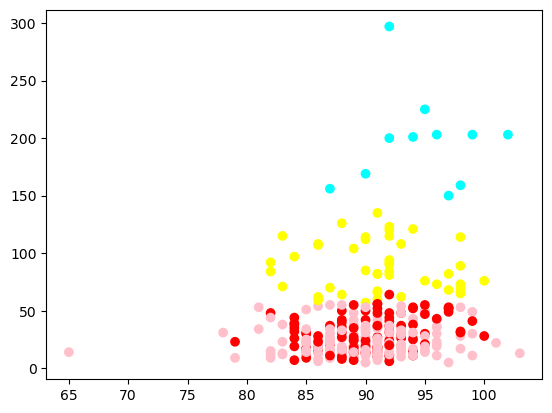

In [140]:
plt.scatter(x.mcv,x.gammagt,color=color_scheme[model.labels_]);

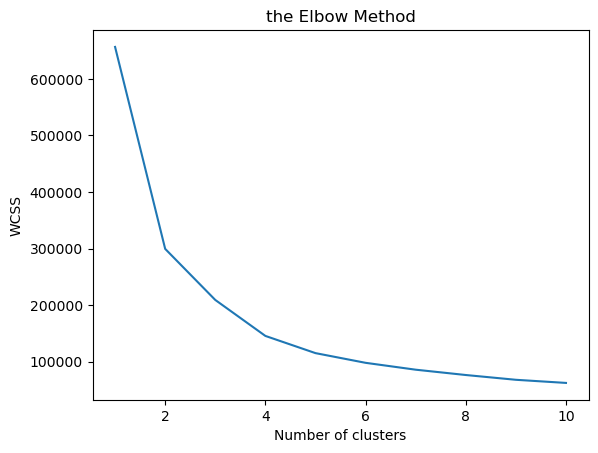

In [134]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [146]:
label=model.labels_
label

from sklearn.metrics import silhouette_score
score=silhouette_score(x,label)
score

0.6573934566541461